In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop('sales', axis=1)
y = df['sales']

In [5]:
from sklearn.preprocessing import PolynomialFeatures

poly_converter = PolynomialFeatures(degree=2, include_bias=False)
poly_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [6]:
poly_features = poly_converter.transform(X) # poly_converter.fit_transform(X)

print(X.shape)
print(poly_features.shape)
X.iloc[0]

(200, 3)
(200, 9)


TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [7]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression
poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = poly_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print(MAE, MSE, RMSE)
# as can be seen model has gotten better with this technique

0.5475837919149653 0.4603062493888319 0.678458730792693


In [11]:
poly_model.coef_
# tv, radio, newspaper, tv2, tv radio, tv newspaper, radio2, radio newspaper, newspaper2

array([ 5.49298090e-02,  1.42197827e-02,  1.16916818e-02, -1.12988475e-04,
        1.08937883e-03, -1.01342723e-04,  2.76385341e-04,  1.44165732e-04,
        8.99438936e-05])

In [12]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [24]:
# which degree to use?
# we should plot 2 graphs. one for test one for train
# if they have similar behavious degree is ok else change it
train_rmse_errors = []
test_rmse_errors = []

for degree in range(1, 10):
    poly_converter = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)

    n_degree_poly_model = LinearRegression()
    n_degree_poly_model.fit(X_train, y_train)

    train_pred = n_degree_poly_model.predict(X_train)
    test_pred = n_degree_poly_model.predict(X_test) 
    

    train_RMSE = np.sqrt(mean_squared_error(y_train, train_pred))
    test_RMSE = np.sqrt(mean_squared_error(y_test, test_pred))


    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)
    

print(train_rmse_errors)
print(test_rmse_errors)

[np.float64(1.5526939990087725), np.float64(0.6057702019226604), np.float64(0.4756847293184344), np.float64(0.3742987908933714), np.float64(0.2410875823801666), np.float64(0.22044269363287083), np.float64(0.21968485935142004), np.float64(0.28088759773427757), np.float64(0.5634444961126488)]
[np.float64(1.9307843822347202), np.float64(0.678458730792693), np.float64(0.5148267621824684), np.float64(1.275058965674257), np.float64(6.410701346538983), np.float64(20.22223007009243), np.float64(104.67395323018643), np.float64(4697.505686169983), np.float64(6348.786714595455)]


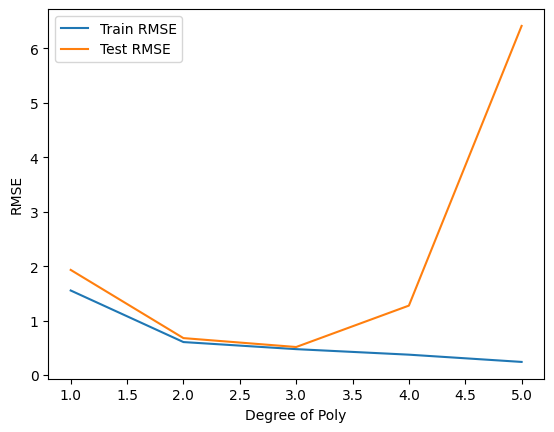

In [29]:
plt.plot(range(1, 6), train_rmse_errors[:5], label="Train RMSE")
plt.plot(range(1, 6), test_rmse_errors[:5], label="Test RMSE")

plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend( )
# as can be seen in the graph after degree 3 the graphs are very different from each other, hence we must use that degree - 1 for our model

# Feature scaling
1. Normalization --> (X - min) / (max - min)  --> 0 to 1
2. Standardization --> (X - mean) / std --> normal distribution

# k-fold class validation
1. using all the data for both training and testing
2. costs time
3. model might get biased since it has seen the test data after 1-hold --> solution: Hold out test set

# Hold Out Test Set
a portion of data will be severed and then on the remaining data k-fold will be excecuted and then we would test it again with that portion